<h2><b>Data Analytics- notebook</b></h2>

<h4><b>Dataset name / short description:</b></h4>

Police Shootings in the US.

<h4><b>Data source (url):</b></h4>

The dataset is located in kaggle.com. <br>
https://www.kaggle.com/datasets/ahsen1330/us-police-shootings

<h4><b>Data format:</b></h4>

The data format is single csv-file.

<h4><b>Data description, features and limitations:</b></h4>

The dataset comprises information on individuals involved in police shootings in the United States, including their name, age, gender, race, location of the incident, manner of death, whether they were armed, signs of mental illness, threat level, attempts to flee, and whether the incident was recorded. Additionally, it includes a column indicating the category of weapon used by the individual.

This dataset might not capture all police-involved shootings, potentially introducing bias. Missing data could affect analysis accuracy, and data quality depends on reporting. It focuses on shootings and may not fully represent broader issues of racism in policing. Additionally, it primarily reflects incidents in the United States and may not capture global perspectives.

The dataset can be used for exploratory data analysis, visualizations, and insights into demographics, incident characteristics, and potential racial disparities in police shootings. It provides a starting point for understanding trends, identifying patterns, and informing discussions around police accountability and racial justice.

<h3><b>Code: importing modules, custom functions and loading the data</b></h3>

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import datetime as dt
import os
import plotly.express as px

# Load the data
df_shootings = pd.read_csv("shootings.csv")

<h3><b>Code: Data clean-up procedure</b></h3>

In [2]:
# View the data
df_shootings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [13]:
# Drop unnecessary columns
df_shootings.drop(['id', 'name', 'city', 'body_camera'], axis=1, inplace=True)
# Dropping 'id' and 'name' columns as they are likely unique identifiers and not relevant for analysis.
# Dropping 'city' column as it may not be crucial for the analysis, especially if state information is available.
# Dropping 'body_camera' column as it may not be directly relevant for analysis.

In [14]:
# Convert 'date' column to datetime format
df_shootings['date'] = pd.to_datetime(df_shootings['date'])
# Converting the 'date' column to datetime format for easier manipulation and analysis.

In [15]:
# Check for missing values
print("Missing values in police_shootings_data:")
print(df_shootings.isnull().sum())

Missing values in police_shootings_data:
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
arms_category              0
dtype: int64


There are no missing values.

In [16]:
# Explore and clean 'armed' column
df_shootings['armed'] = df_shootings['armed'].str.lower()
# Converting values in the 'armed' column to lowercase for consistency.
# This helps in avoiding case sensitivity issues when referencing values programmatically.

<h3><b>Code: Data analysis</b></h3>

/var/folders/l9/x0255jx977jgl0hnb9tcnzr80000gp/T/ipykernel_92879/3786557877.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=race_counts.values, y=race_counts.index, palette='pastel')


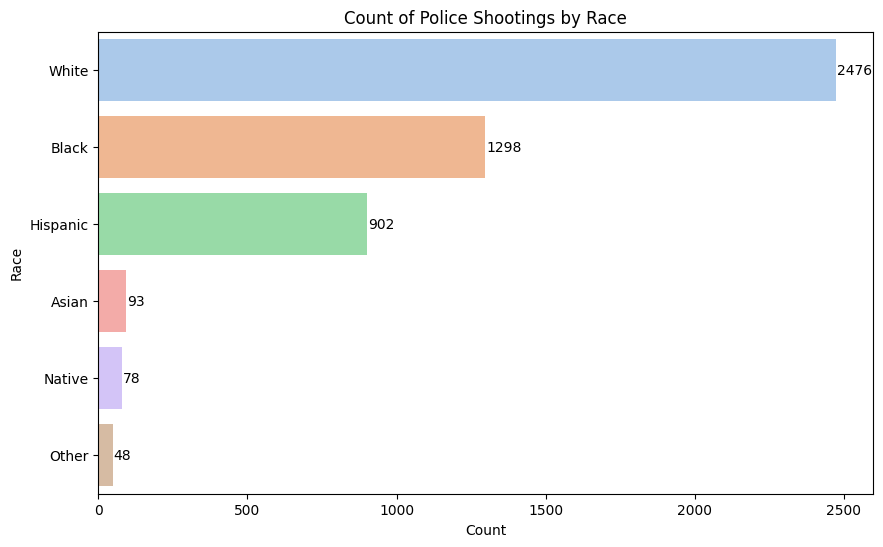

In [38]:
# Calculate count of shootings by race
race_counts = df_shootings['race'].value_counts()

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=race_counts.values, y=race_counts.index, palette='pastel')

# Add count values next to each bar
for i, v in enumerate(race_counts.values):
    plt.text(v + 3, i, str(v), color='black', va='center')

plt.title('Count of Police Shootings by Race')
plt.xlabel('Count')
plt.ylabel('Race')
plt.show()

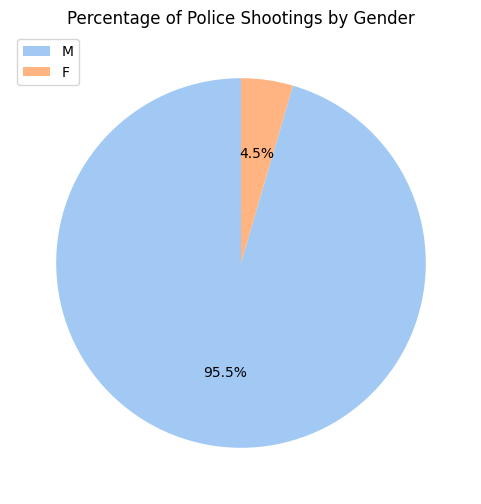

In [42]:
# Calculate count of shootings by gender
gender_counts = df_shootings['gender'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), labels=None)
plt.title('Percentage of Police Shootings by Gender')
plt.ylabel('')
plt.legend(labels=gender_counts.index, loc='upper left')
plt.show()

/var/folders/l9/x0255jx977jgl0hnb9tcnzr80000gp/T/ipykernel_92879/951715543.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.values, y=state_counts.index, palette='pastel')


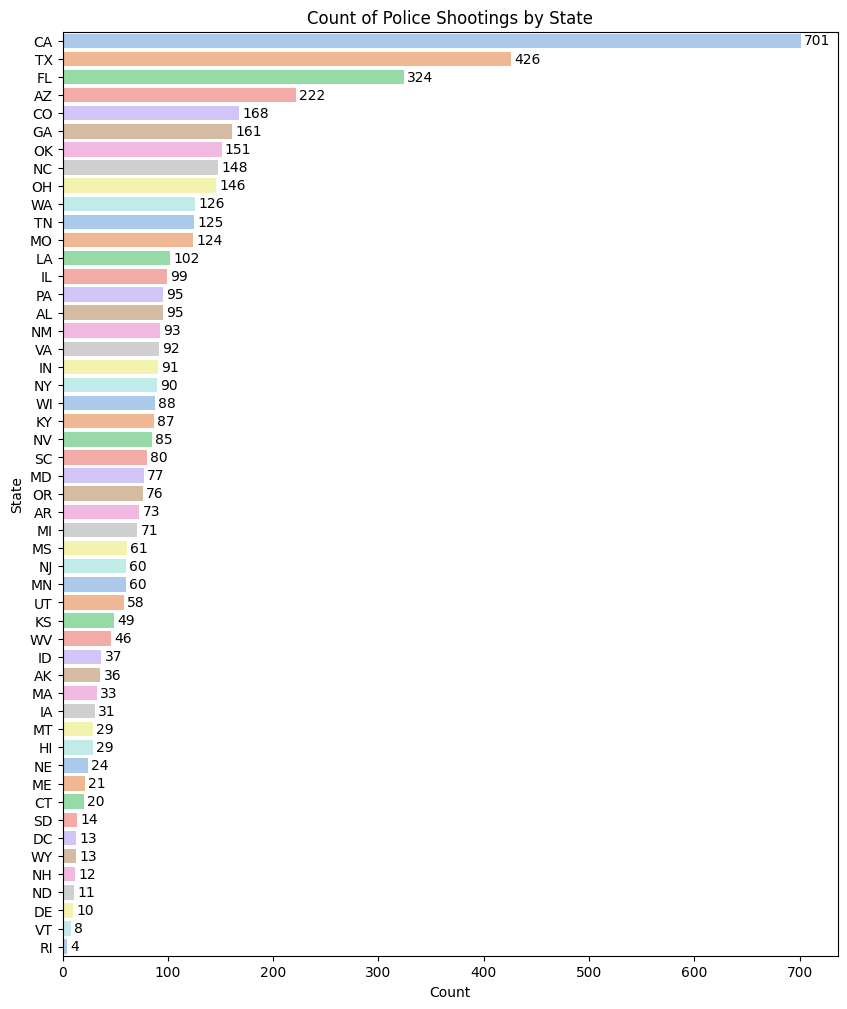

In [45]:
# Calculate count of shootings by state
state_counts = df_shootings['state'].value_counts()

# Plot horizontal bar chart
plt.figure(figsize=(10, 12))
sns.barplot(x=state_counts.values, y=state_counts.index, palette='pastel')

# Add count values next to each bar
for i, v in enumerate(state_counts.values):
    plt.text(v + 3, i, str(v), color='black', va='center')

plt.title('Count of Police Shootings by State')
plt.xlabel('Count')
plt.ylabel('State')
plt.show()

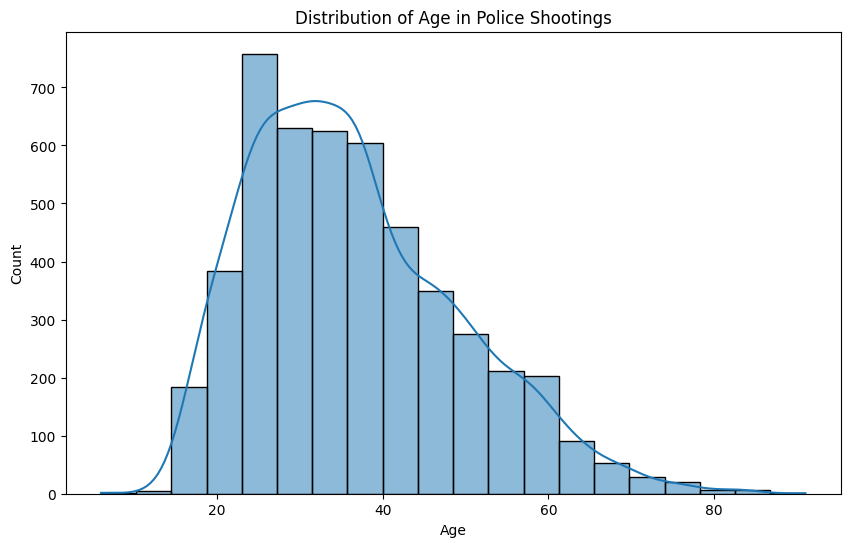

In [52]:
# Plot histogram for distribution of age in police shootings
plt.figure(figsize=(10, 6))
sns.histplot(data=df_shootings, x='age', bins=20, kde=True)
plt.title('Distribution of Age in Police Shootings')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

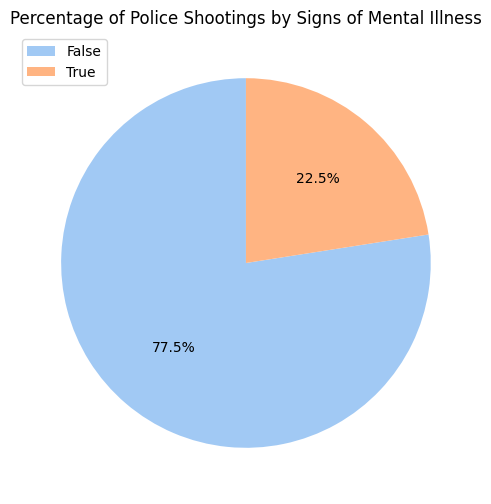

In [54]:
# Calculate count of shootings by signs_of_mental_illness
mental_illness_counts = df_shootings['signs_of_mental_illness'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
mental_illness_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), labels=None)
plt.title('Percentage of Police Shootings by Signs of Mental Illness')
plt.ylabel('')
plt.legend(labels=mental_illness_counts.index, loc='upper left')
plt.show()

/var/folders/l9/x0255jx977jgl0hnb9tcnzr80000gp/T/ipykernel_92879/2062190466.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=arms_category_counts.values, y=arms_category_counts.index, palette='pastel')


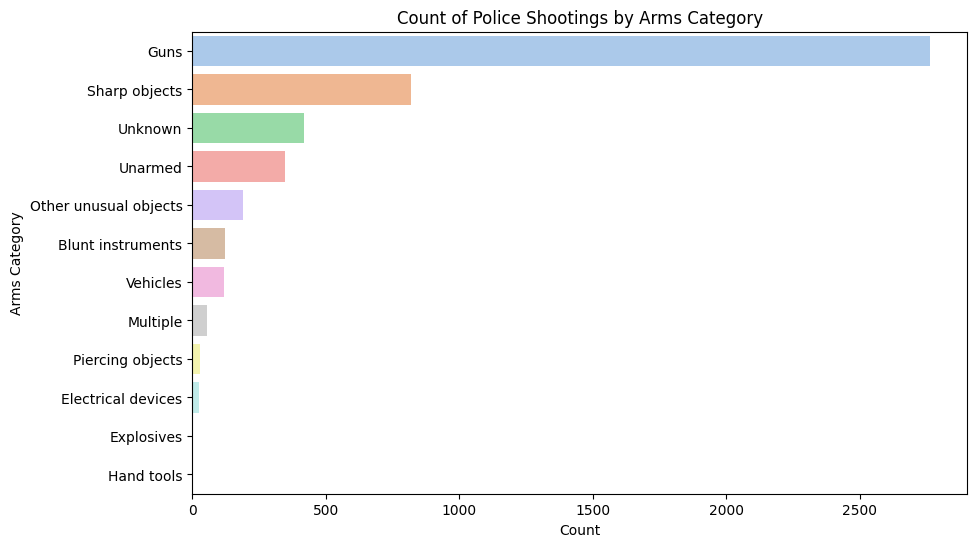

In [55]:
# Calculate count of shootings by arms_category
arms_category_counts = df_shootings['arms_category'].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=arms_category_counts.values, y=arms_category_counts.index, palette='pastel')
plt.title('Count of Police Shootings by Arms Category')
plt.xlabel('Count')
plt.ylabel('Arms Category')
plt.show()

/var/folders/l9/x0255jx977jgl0hnb9tcnzr80000gp/T/ipykernel_92879/665766738.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=armed_vs_unarmed_counts.index, y=armed_vs_unarmed_counts.values, palette='pastel')


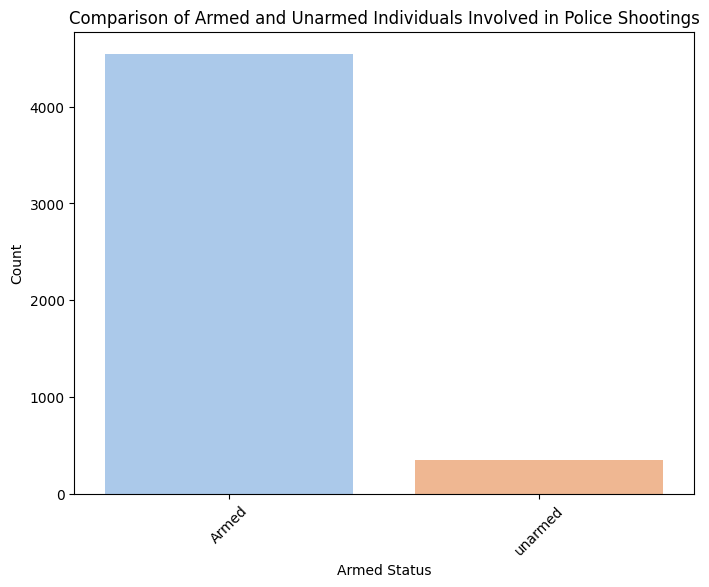

In [62]:
# Create a copy of the dataframe
df_armed_vs_unarmed = df_shootings.copy()

# Replace all types of armed with "Armed"
df_armed_vs_unarmed['armed'] = df_armed_vs_unarmed['armed'].apply(lambda x: 'Armed' if x != 'unarmed' else x)

# Count of shootings by armed status
armed_vs_unarmed_counts = df_armed_vs_unarmed['armed'].value_counts()

# Plotting comparison between armed and unarmed individuals
plt.figure(figsize=(8, 6))
sns.barplot(x=armed_vs_unarmed_counts.index, y=armed_vs_unarmed_counts.values, palette='pastel')
plt.title('Comparison of Armed and Unarmed Individuals Involved in Police Shootings')
plt.xlabel('Armed Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<h3><b>Results and summary:</b></h3>

The analysis of police shootings data provides valuable insights into the dynamics and factors influencing these incidents. Across various demographic factors such as race, gender, age, and mental health status, disparities and patterns emerge, shedding light on underlying issues within law enforcement and society as a whole.

Racial disparities are evident, with white individuals being involved in police shootings about double the rate of black individuals, despite there being significantly fewer black individuals in the population. As of 2020, the United States Census Bureau estimated that approximately 76.3% of the population identified as white alone, while 13.4% identified as Black or African American alone. The disproportionate involvement of black individuals in police shootings, despite their lower population share, underscores deep-seated issues such as racial biases in law enforcement, systemic inequalities, socioeconomic disparities, and historical injustices. Factors such as over-policing in predominantly black communities, racial profiling, disparities in access to resources and opportunities, and a lack of trust between law enforcement and minority communities contribute to the overrepresentation of black individuals in police shootings.

Hispanic individuals also face a disproportionate risk of being involved in police shootings, although to a lesser extent than black individuals. The reasons behind this disparity may include similar factors such as racial biases, socioeconomic disparities, and immigration-related issues.

Gender also plays a significant role, with a vast majority of individuals involved in police shootings being male. This disparity may stem from higher rates of criminal involvement among males and societal expectations regarding masculinity and aggression.

State-level variations in police shootings highlight differences in law enforcement policies, population demographics, and socio-economic conditions. States like California, Texas, and Florida experience higher numbers of police shootings, indicating the need for further examination of local law enforcement practices and community relations.

Age distribution reveals that individuals in their early twenties to forties are most commonly involved in police shootings, with a significant number in late teens as well. This underscores the importance of understanding age-related crime trends, interactions between law enforcement and different age groups, and societal perceptions of age and criminality.

The presence of mental illness among individuals involved in police shootings underscores the challenges in law enforcement's response to mental health crises. Efforts to improve mental health resources, crisis intervention training, and reduce stigma surrounding mental illness are crucial in addressing this issue.

Guns emerge as the predominant weapon involved in police shootings, reflecting America's gun culture and lax gun laws. Addressing gun violence requires comprehensive gun control measures, including stricter regulations on firearms acquisition and ownership.

Overall, the analysis underscores the complex interplay of social, cultural, and institutional factors shaping police shootings. Addressing these issues requires a multifaceted approach, encompassing reforms in law enforcement practices, community engagement, mental health support systems, and gun control policies to ensure the safety and well-being of all individuals within society.

<h3><b>Ideas for further improvements:</b></h3>

I would further improve this data analysis by incorporating additional factors that may have influenced police shootings, such as socio-economic indicators, community policing initiatives, or the prevalence of firearms. Additionally, integrating external data sources related to significant events like the COVID-19 pandemic could provide context and help elucidate broader trends or shifts in law enforcement practices. Moreover, I would also add more data about the police involved, such as their tenure in law enforcement, training records, and previous incidents. Analyzing the curriculum and practices of police academies across the USA could provide valuable insights into training methods and potential areas for improvement in officer preparation and response protocols.